##Random Forest with ['LeverZmax','LeverZmin','HLZmax','HLZmin'] performs at nearly 70% accuracy. Performs at 80% with removing NextLever omits (0)
['LeverZmax','HLZmax'] = 54%


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

behav = pd.read_csv('../data/300behavior.csv')

# Assuming behav is your DataFrame and it's already imported
# Replace all occurrences of 3 with 2 in the 'NextLever' column
behav['NextLever'] = behav['NextLever'].replace(3, 2)
behav = behav[behav['NextLever'] != 0]

B23behav = behav[(behav['Trial#'] > 20) & ~(behav['Trial#'].isin([40, 60]))]

B23behav.head

<bound method NDFrame.head of       ID    Date  Trial#  Lever  NextLever  WSLS  LeverZmax  LeverZmin  \
20    16  230123      21      3          2     1   2.401602  -1.003824   
21    16  230123      22      3          2     1   2.926855  -1.217437   
22    16  230123      23      3          2     1   1.696856  -1.406294   
23    16  230123      24      3          2     1   1.724995  -1.203465   
24    16  230123      25      3          2     1   0.747431  -1.450247   
...   ..     ...     ...    ...        ...   ...        ...        ...   
1668  32  230407      46      2          2     4   2.178934  -2.011815   
1669  32  230407      47      2          1     2   1.441027  -1.541796   
1671  32  230407      50      1          2     0   0.368848  -0.990443   
1672  32  230407      51      3          1     3   3.332265  -1.602789   
1674  32  230407      55      1          2     0   0.637471  -3.201188   

        LeverAUC    HLZmax    HLZmin       HLAUC  
20     80.581480  2.714354 -3.

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Example dataset
# Replace this with your actual dataset
df = B23behav

# Assuming df is your DataFrame and 'NextLever' is the target variable
X = B23behav[['LeverZmax','LeverZmin','HLZmax','HLZmin']]  # Predictor variables
y = B23behav['NextLever']  # Target variable with three categories

# Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Creating the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Training the classifier using the resampled training data
rf.fit(X_train_res, y_train_res)

# Making predictions on the test data
y_pred = rf.predict(X_test)

# Evaluating the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.21      0.38      0.27        29
           2       0.93      0.84      0.88       265

    accuracy                           0.80       294
   macro avg       0.57      0.61      0.57       294
weighted avg       0.85      0.80      0.82       294

Confusion Matrix:
[[ 11  18]
 [ 42 223]]


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming rf_model is your trained Random Forest model
feature_importances = rf.feature_importances_

# Getting feature names (make sure this matches the order of features used in the model)
feature_names = X_train_res.columns  # Adjust X_train to your training dataset

# Create a pandas Series to view the feature importances
importances = pd.Series(feature_importances, index=feature_names)


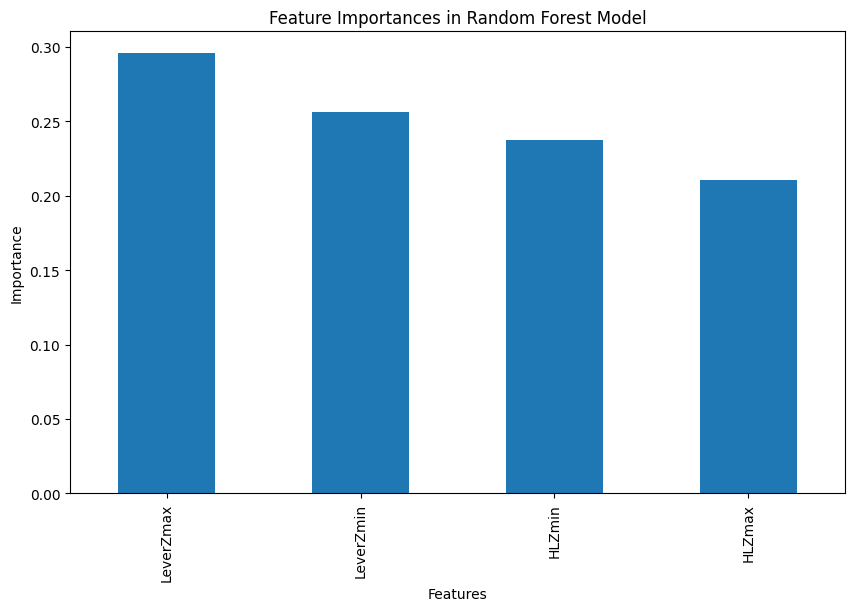

In [26]:
# Sort the feature importances in descending order
sorted_importances = importances.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


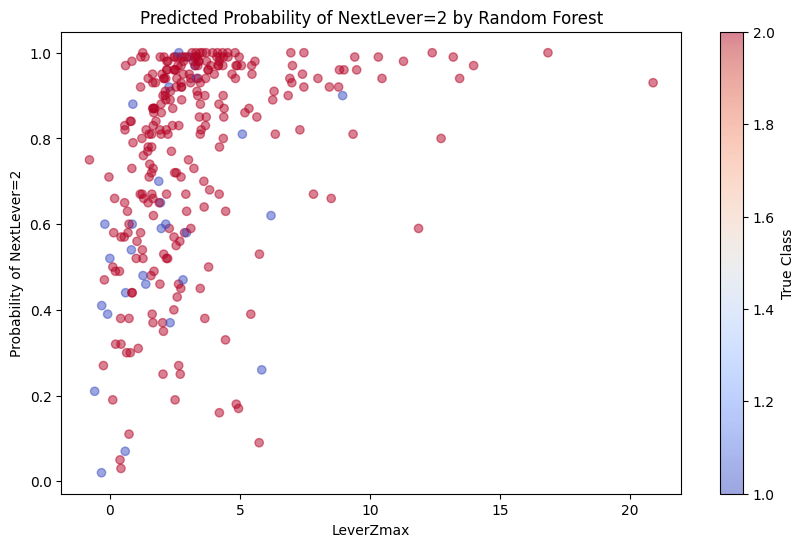

In [32]:
y_prob = rf.predict_proba(X_test)  # rf is your trained Random Forest model
prob_next_lever_2 = y_prob[:, 1]

import matplotlib.pyplot as plt

# This assumes X_test has a meaningful index or a specific column to use for the x-axis
# Replace 'X_axis_column' with the column name or index to plot on the x-axis
x_axis = X_test['LeverZmax']  

plt.figure(figsize=(10, 6))
plt.scatter(x_axis, prob_next_lever_2, c=y_test, alpha=0.5, cmap='coolwarm')
plt.colorbar(label='True Class')
plt.xlabel('LeverZmax')
plt.ylabel('Probability of NextLever=2')
plt.title('Predicted Probability of NextLever=2 by Random Forest')
plt.show()


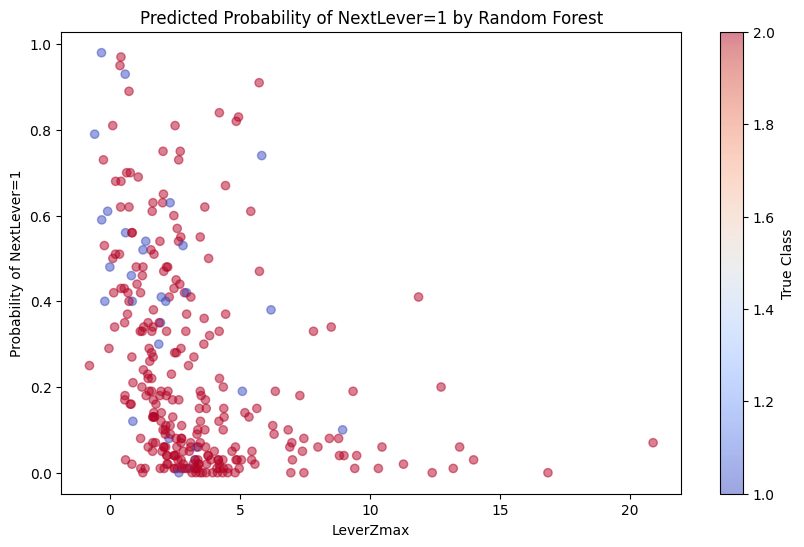

In [29]:
y_prob = rf.predict_proba(X_test)  # rf is your trained Random Forest model
prob_next_lever_2 = y_prob[:, 0]

import matplotlib.pyplot as plt

# This assumes X_test has a meaningful index or a specific column to use for the x-axis
# Replace 'X_axis_column' with the column name or index to plot on the x-axis
x_axis = X_test['LeverZmax']  

plt.figure(figsize=(10, 6))
plt.scatter(x_axis, prob_next_lever_2, c=y_test, alpha=0.5, cmap='coolwarm')
plt.colorbar(label='True Class')
plt.xlabel('LeverZmax')
plt.ylabel('Probability of NextLever=1')
plt.title('Predicted Probability of NextLever=1 by Random Forest')
plt.show()